In [1]:
from sklearn import datasets, metrics, model_selection
from sklearn.ensemble import RandomForestClassifier

import numpy as np

import matplotlib.pyplot as plt

### Load Breast Cancer Data

In [2]:
breastCancer = datasets.load_breast_cancer()

### Get Samples from data

In [3]:
numberOfFeatures = 10
X = breastCancer.data[:, :numberOfFeatures]
y = breastCancer.target

### Split the dataset to train-test (70%-30%)

In [4]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X,y,
                                        random_state=42,train_size=.7)

### Create the Random Forest model and train it using the training data

In [5]:
model = RandomForestClassifier(10, criterion='entropy', max_depth=5, random_state=42)

model = model.fit(x_train,y_train)

### Make predictions based on the testing data

In [6]:
y_predicted = model.predict(x_test)

## Evaluate the model

In [7]:
print("Accuracy: %7.3f%%" %(metrics.accuracy_score(y_test, y_predicted) * 100))
print("Precision: %5.3f%%" %(metrics.precision_score(y_test, y_predicted) * 100))
print("Recall: %9.3f%%" %(metrics.recall_score(y_test, y_predicted) * 100))
print("F1 Score: %7.3f%%" %(metrics.f1_score(y_test, y_predicted) * 100))

Accuracy:  95.322%
Precision: 97.170%
Recall:    95.370%
F1 Score:  96.262%


<hr>

# Calculate metrics using up to 200 trees

#### Create 4 empty arrays to store the results

In [8]:
accuracy_200 = np.zeros(200, dtype=np.float64)
precision_200 = np.zeros(200, dtype=np.float64)
recall_200 = np.zeros(200, dtype=np.float64)
f1_score_200 = np.zeros(200, dtype=np.float64)

#### Create 200 models ranging from 1 to 200 trees and store each metric in each array respecively

In [9]:
for n_trees in range(200):
  model = RandomForestClassifier(n_trees+1, criterion='gini', max_depth=5, random_state=132)
  model = model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy_200[n_trees] = metrics.accuracy_score(y_test,y_pred)
  precision_200[n_trees] = metrics.precision_score(y_test,y_pred)
  recall_200[n_trees] = metrics.recall_score(y_test, y_pred)
  f1_score_200[n_trees] = metrics.f1_score(y_test, y_pred)

### Plot Accuracy curve

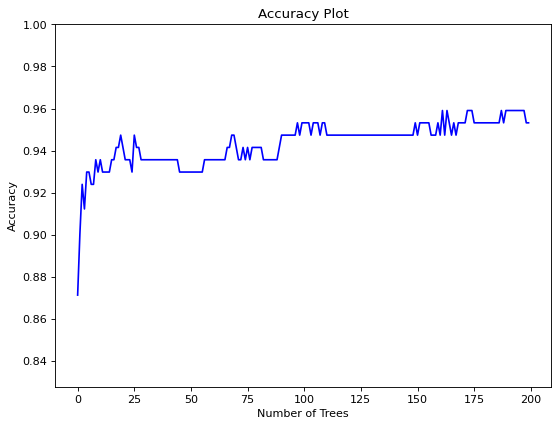

In [10]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(np.arange(200, dtype=np.int16), accuracy_200, '-b')
ax = plt.gca()
ax.set_ylim([np.min(accuracy_200)-.05*np.min(accuracy_200),1.0])
plt.title("Accuracy Plot")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.show()

### Plot Precision curve

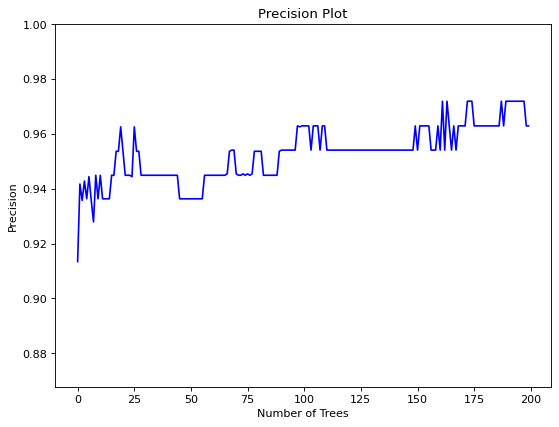

In [11]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(np.arange(200, dtype=np.int16), precision_200, '-b')
ax = plt.gca()
ax.set_ylim([np.min(precision_200)-.05*np.min(precision_200),1.0])
plt.title("Precision Plot")
plt.xlabel("Number of Trees")
plt.ylabel("Precision")
plt.show()


### Plot Recall curve

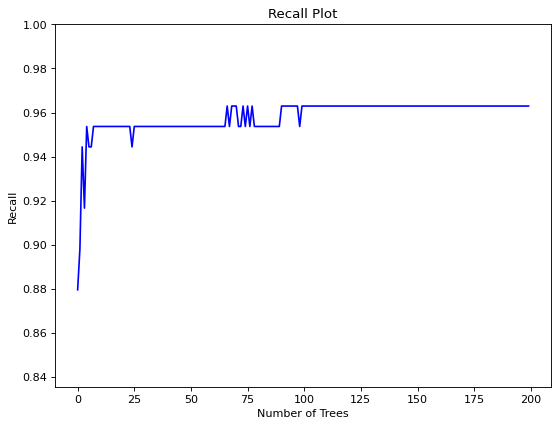

In [12]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(np.arange(200, dtype=np.int16), recall_200, '-b')
ax = plt.gca()
ax.set_ylim([np.min(recall_200)-.05*np.min(recall_200),1.0])
plt.title("Recall Plot")
plt.xlabel("Number of Trees")
plt.ylabel("Recall")
plt.show()

### F1 Score Plot

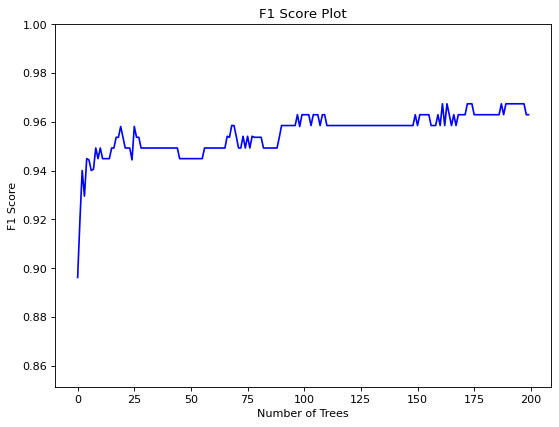

In [13]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(np.arange(200, dtype=np.int16), f1_score_200, '-b')
ax = plt.gca()
ax.set_ylim([np.min(f1_score_200)-.05*np.min(f1_score_200),1.0])
plt.title("F1 Score Plot")
plt.xlabel("Number of Trees")
plt.ylabel("F1 Score")
plt.show()